<a href="https://colab.research.google.com/github/tiwarya/Public_Projects_1-/blob/main/Machine_Learning_Course_for_Everyone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Everyone - Full Course

link - https://www.youtube.com/watch?v=i_LwzRVP7bg

I decided to this because I think this is a great starting point, Kylie Ying is a great instructor, and I do wish to learn more about this field and therefore I begin my journey into ML through this. I hope, this venture of mine will lead to further courses and projects and I hope I can deliver on this promise to myself. I want to be a better person and better learner overall and move past all of my prior failures. I will not update this cell, any time in the future so if you or I open this file years down the line, probably will look at this with pride or regret, the former i certainly hope.

Note: some cells and functions are given a temporary status, since changes were made later on. I don't want that to ruin the prior learnings so We will constantly keep creating updated versions which we will actually learning. All temporary functions or dfs or variables or whatever will be given a 'Temp' prefix

# Part 1 - Magic Dataset

Source: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Citation: Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

Data are MC (Monte Carlo) generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope.

Crux: Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

In [ ]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#we downloaded, extracted and dragged and dropped the file into colab
#now can access it
pd.read_csv('magic04.data')

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


It doesn't seem to have any column labels.

So we will go back to the website and get the same. Then we will manually enter it. Btw given below is the attribute information.

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
pd.read_csv('magic04.data', names = cols)
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

g - gammas, h - hadrons

Computers are not good at dealing with characters, therefore conversion to numbers is important. We can change g - 1[true], and h - 0[false].

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In the ML model, our goal is to predict whether future samples will be g or h, and through this is called classification. The columns are the features, we pass these into our model to predict the label, which is the class column (therefore class column isn't a feature. This is supervised learning.

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


You can see, g = 1.

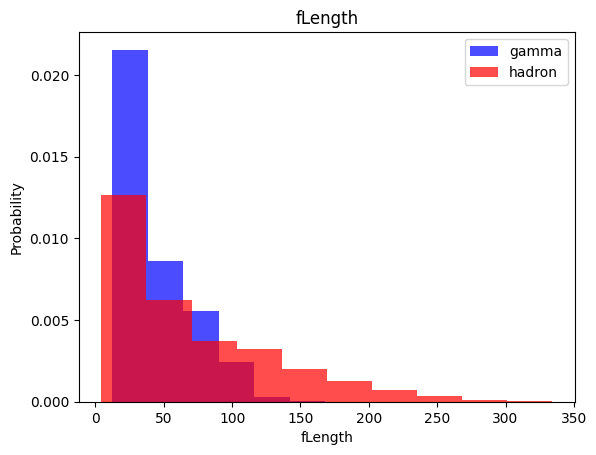

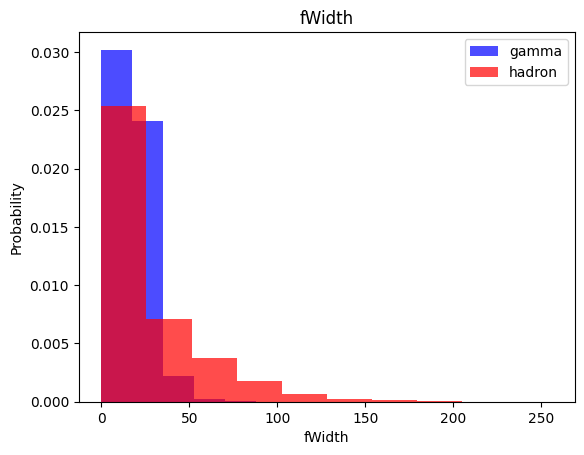

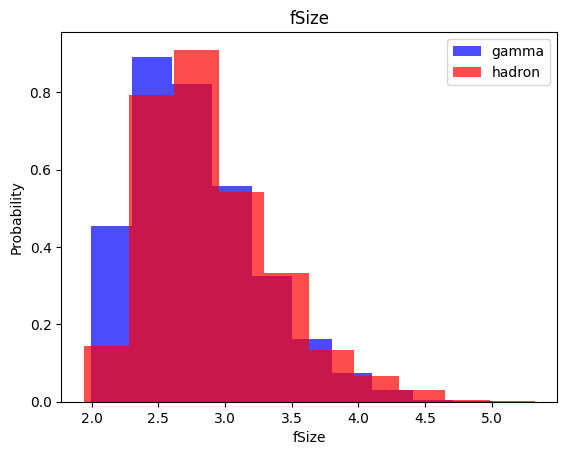

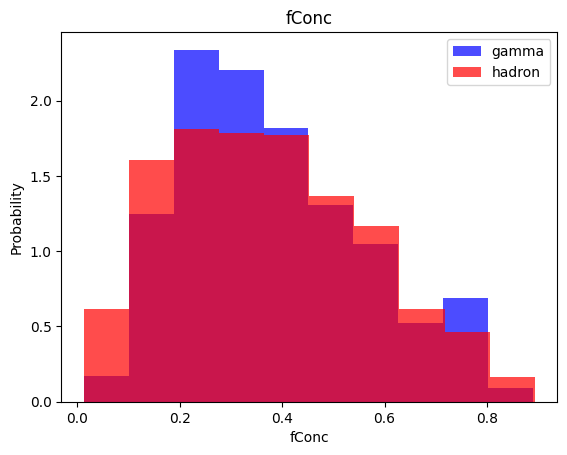

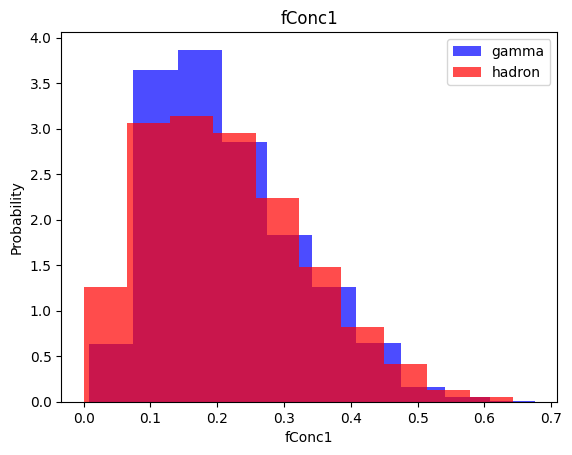

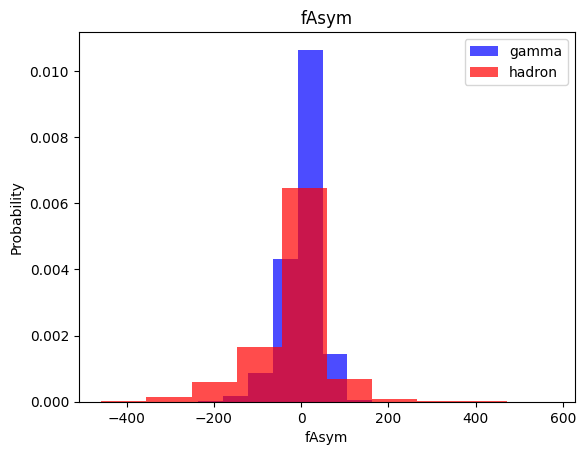

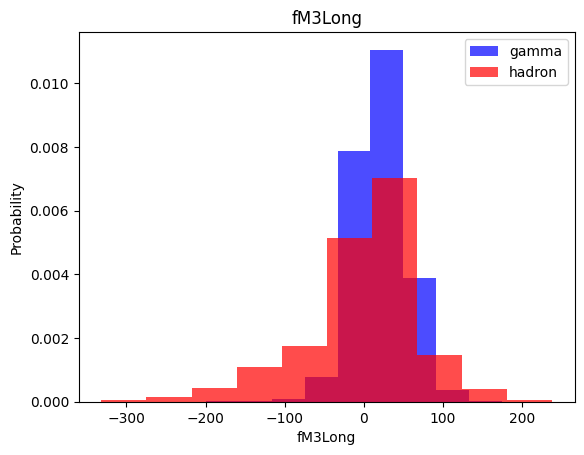

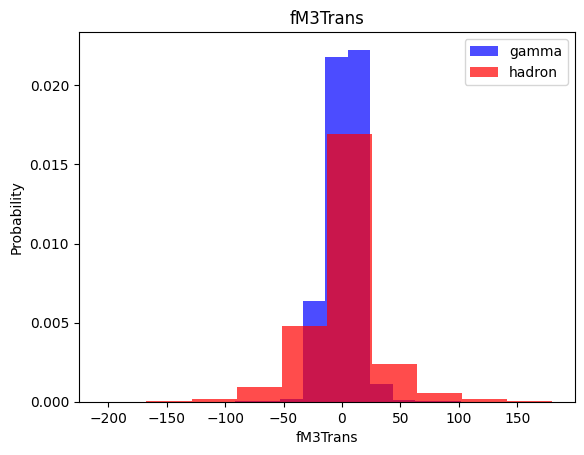

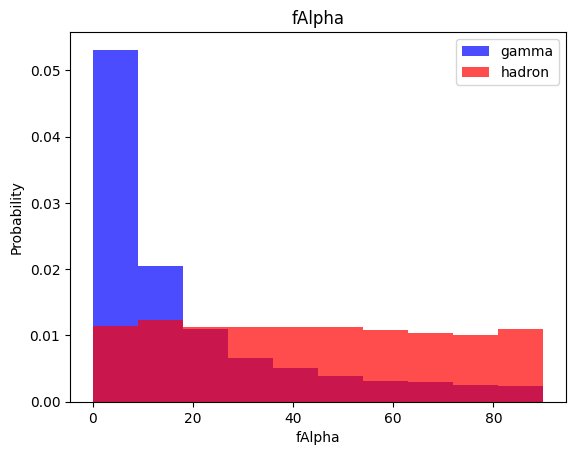

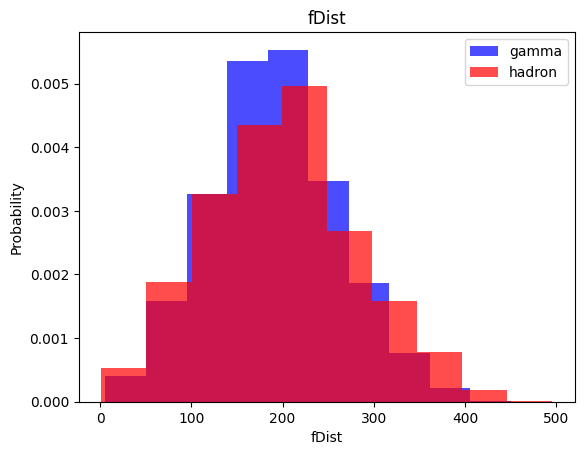

In [ ]:
for labels in cols[:-1]:
  #therefore for everything column label except the last, class.
  #up till the last item
   plt.hist(df[df["class"]==1] [labels], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
   plt.hist(df[df["class"]==0] [labels], color = 'red', label = 'hadron', alpha = 0.7, density = True)
   plt.title(labels)
   plt.ylabel("Probability")
   plt.xlabel(labels)
   plt.legend()
   plt.show()

## Train, Validation and Test Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#The frac argument in the sample() method defines the fraction of random items you want to obtain.
#So, if frac=0.5, it will return 50% of the rows.
#here the int argument, first split at 0.6, second at 0.8

In [ ]:
#READ THIS CELL CAREFULLY
#This is a temp function
#WE WILL USE AN UPDATED VERSION BELOW

#we define this function to scale up the values of the columns
#this is due to the fact that some columns have
#incredibly large values, and some have smaller values
def Temp_scale_dataframe(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  #understand why X is W and y is y
  #X  - features matrix
  #y - targets vector

  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  #take x and fit the standard scaler to x and that is what our new values will be
  #now we will convert the array (x) into a 2d numpy matrix
  data = np.hstack((X,np.reshape(y, (-1,1))))
  #here x is 2d and y is 1d, so i will update above line to reshape y
  #here -1 tells computer to infer dimension value
  #ends up being lenght of y
  #same as putting (len(y), 1)

  return data, X, y


In [ ]:
#try and run this code
#both and check for the distribution of the old and new version.

In [ ]:
#next up lets just look at the training df for a second
train
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

#7k Gs and 4k Hs
#there we wanna increase the number Hs to better fit the Gs
#we will use RandomOverSampler




7396
4016


For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used.

In [ ]:
#UPDATED VERSION

def scale_dataframe(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample: #default arg - True
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
    #what this does is, take the smaller class and keep sampling to increase the size of our dataset
    #so that they now match

  data = np.hstack((X,np.reshape(y, (-1,1))))


  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataframe(train, oversample = True)

In [ ]:
#only for my reference - unimportant - dont run
Temp_train  = np.reshape(train, (-1,11))
Temp_train
#read into a file and then use pandas, do it later
Temp_train_df = pd.DataFrame(Temp_train, columns = cols)
Temp_train_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,-0.014388,0.059813,-0.010125,0.012133,0.128376,-0.655023,-1.357554,-0.555381,0.576152,-2.138272,0.0
1,-0.677556,-0.398081,-0.788092,0.289580,0.306743,0.247984,0.092343,0.350190,-0.705648,0.334230,1.0
2,-0.636622,-0.228547,-0.106760,-0.194442,-0.351211,0.205398,0.003165,0.563202,0.019349,-1.472060,1.0
3,0.390655,-0.155721,0.693507,-0.807023,-0.841720,0.670444,0.958249,-0.408666,-0.891944,0.671197,1.0
4,0.682449,0.184749,1.102986,-0.904816,-0.809868,-0.313561,1.044557,-0.886764,-1.000130,1.908089,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14787,-0.459410,-0.643507,-1.320542,0.286284,0.052844,0.210629,0.132734,0.430079,1.365543,-1.065014,0.0
14788,2.939824,5.345215,1.681948,-1.158089,-1.214834,-1.327329,-3.256020,4.734757,-0.249620,1.114847,0.0
14789,1.498646,-0.403617,0.466043,-0.817461,-0.647882,-3.456716,1.815792,-0.856493,0.431708,0.917590,0.0
14790,-0.534246,-0.495568,-0.403462,0.297821,0.588854,0.028176,0.148382,0.399554,1.641171,-1.575529,0.0


In [ ]:
#unimportant - dont run
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


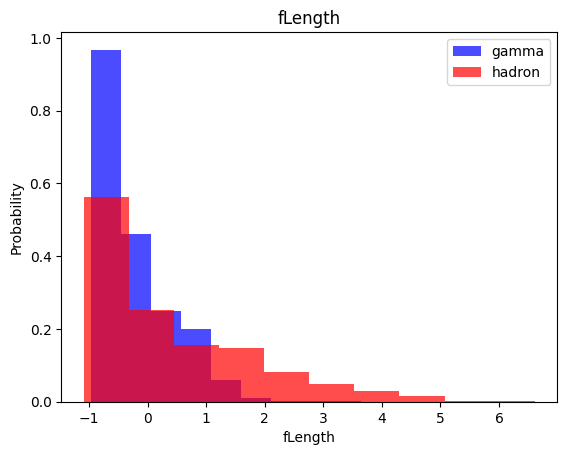

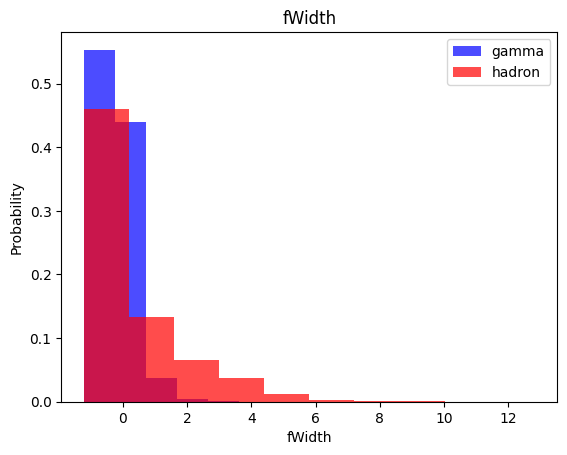

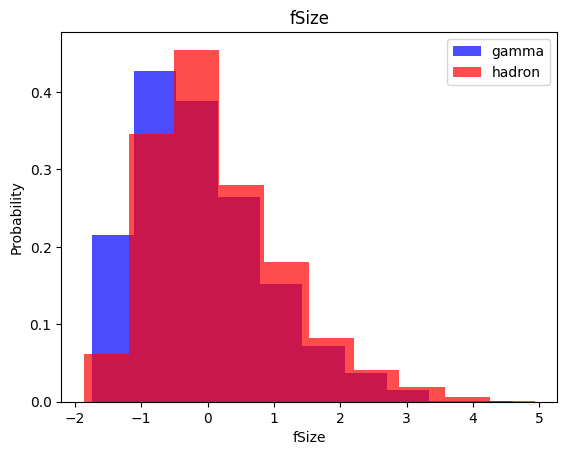

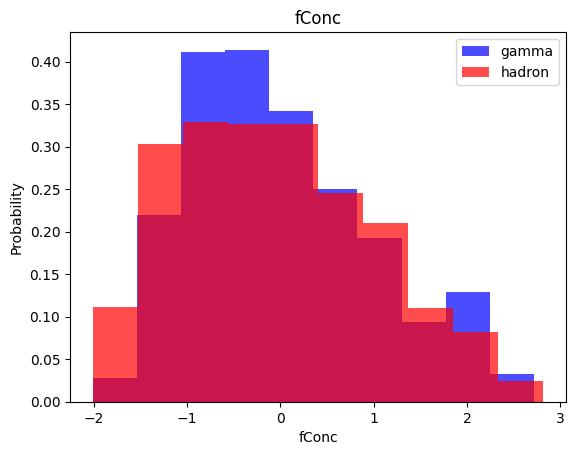

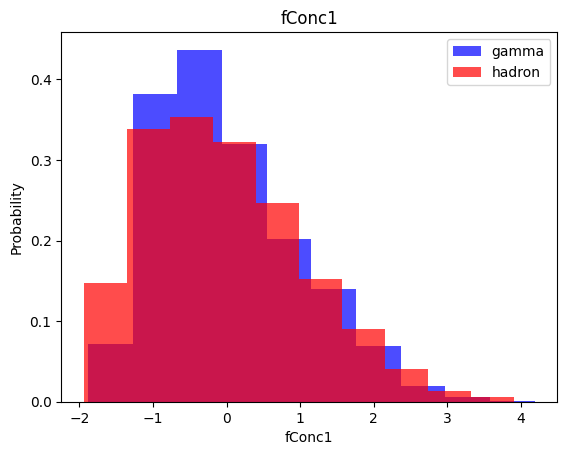

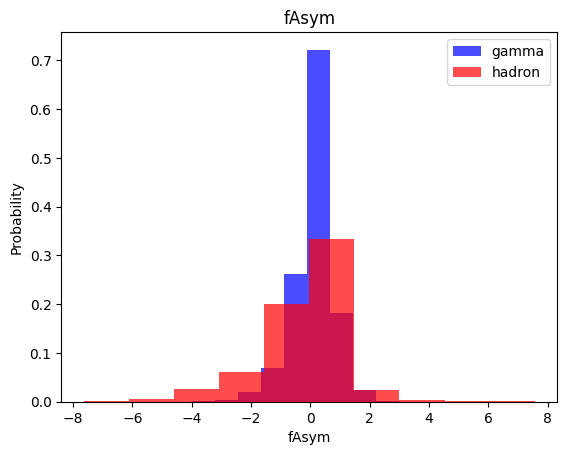

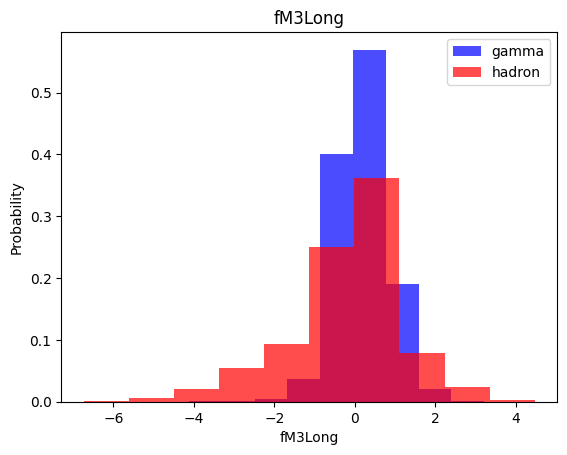

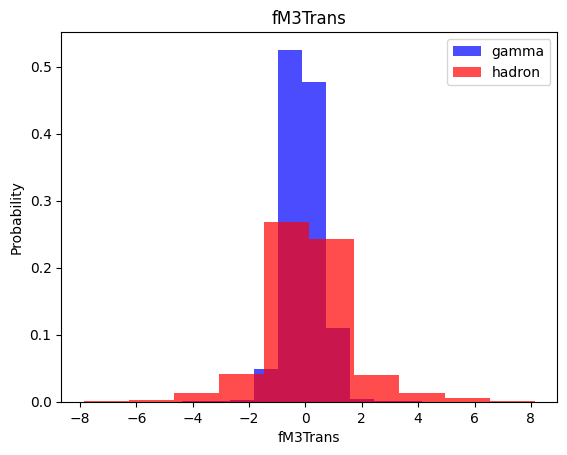

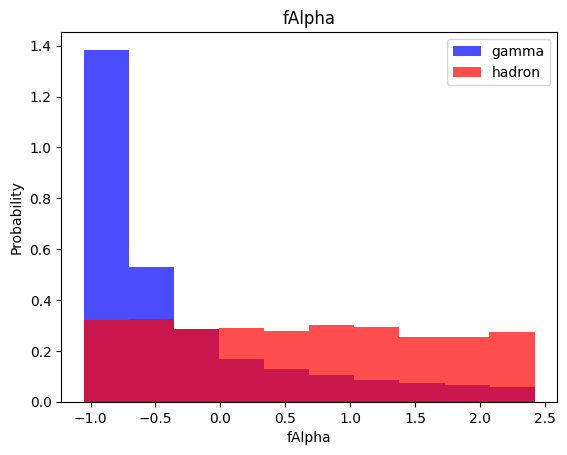

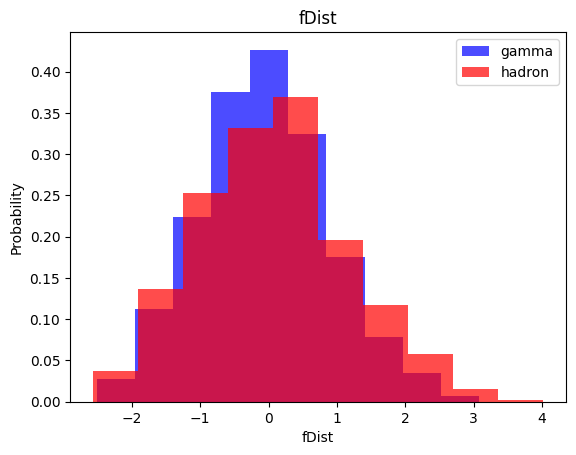

In [ ]:
#unimportant - dont run
for labels in cols[:-1]:
  #therefore for everything column label except the last, class.
  #up till the last item
   plt.hist(Temp_train_df[Temp_train_df["class"]==1.0] [labels], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
   plt.hist(Temp_train_df[Temp_train_df["class"]==0.0] [labels], color = 'red', label = 'hadron', alpha = 0.7, density = True)
   plt.title(labels)
   plt.ylabel("Probability")
   plt.xlabel(labels)
   plt.legend()
   plt.show()

**Only for reference**

So, in the above cell has, the new temporary dataframe has been put through both a RandomOverSampler and StandardScaler, which has helped standardize the dataset to exclude massive variations in data, while still maintaining the overall ratio/picture/proportions. When compared with the original df, there are slight differences (caused by random oversampling) but the overall shape fo the histogram remains the same. Also the Y-axis has been standardized to only have a single decimal point.

In [ ]:
len(y_train)

14792

In [ ]:
print(sum(y_train == 1))
print(sum(y_train == 0))

7396
7396


In [ ]:
print(sum(train == 1))
print(sum(train == 0))

[   0    0    0    0    0    0    0    0    0    0 7396]
[   0    0    0    0    0    0    0    0    0    0 7396]


They are equal now.
They are balanced now.

Lets do the same for all datasets

In [ ]:
valid, X_valid, y_valid = scale_dataframe(valid, oversample = False)
test, X_test, y_test = scale_dataframe(test, oversample = False)

#we switch oversample to false, why?
#reason - we wanna see the performce of our model on the two
#we dont wanna oversample, they have to random
#in order to establish trust in the model

## Time to learn about models

Now we will attempt to use different models to arrive at different outcomes.

## Basic Classification Models

### kNN

K-Nearest Neighbors Algorithm.

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#scikit learn
#M/L Library It features various classification, regression and clustering algorithms
#including support-vector machines, random forests, gradient boosting, k-means and DBSCAN,
#and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred
#predictive values for that dataset

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test
#actual values for that dataset

array([1, 0, 1, ..., 1, 1, 1])

### Classification Report

Lets take a look at classification report provided by sklearn

sklearn.metrics.classification_report is a tool in the Scikit-Learn library that provides a summary of the performance of a classification model.

When you use it, you'll get:

Precision: For each class, it tells you the ratio of true positive predictions to the total positive predictions (true positives + false positives). It answers the question: "Of all the times the model labeled something as Class A, how often was it correct?"

Recall: For each class, it indicates the ratio of true positive predictions to the actual positives in the data (true positives + false negatives). It answers the question: "Of all the actual Class A instances, how many did the model correctly identify?"

F1-Score: A single metric that combines both precision and recall using the harmonic mean. It's especially useful when you want a balance between precision and recall.

Support: The number of actual occurrences of each class in the specified dataset.

Micro, Macro, and Weighted averages: These are different ways to average the precision, recall, and F1-score:

Micro: Globally count total true positives, false negatives, and false positives.
Macro: Average the unweighted metric scores for each class.
Weighted: Average the metric scores of each class, considering the number of true instances for each label (support).
In Simple Terms:
classification_report gives you a quick overview of how well your classification model is doing for each class. It tells you about its accuracy in labeling, how often it misses, and provides a combined performance score, all neatly summarized in a table.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1316
           1       0.83      0.88      0.86      2488

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



Describing it, accuracy is 81% not too bad. We got that many right.

On precision and recall, look at: https://en.wikipedia.org/wiki/Precision_and_recall


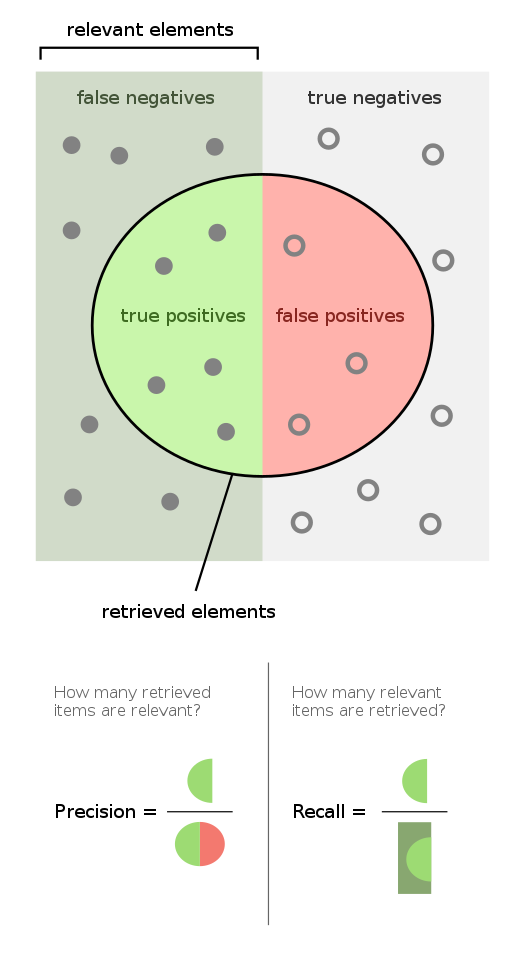


Precision: It tells you how accurate your model is when it claims a data point belongs to a certain class. In other words, when the model says "This is Class A", how often is it actually right?

Recall: It indicates how good your model is at capturing all the data points of a certain class. That is, out of all the data points that truly are "Class A", how many did the model correctly identify?

In Simple Terms:
Imagine you have a basket of fruits, and you're trying to pick out all the apples.

Precision: Out of all the fruits you claimed were apples, how many were actually apples?

Recall: Out of all the real apples in the basket, how many did you manage to pick out?

*Now, what if made the k = 3, instead of 1*

**Difference Example:**

Imagine you have an alarm system to detect burglars.

It goes off 8 times: 5 times for actual burglars and 3 times because of a cat.
There were a total of 7 burglars that night, so the alarm missed 2 burglars.
Precision:
Out of the 8 alarms, only 5 were actual burglars.
Precision = 5/8 = 62.5%
(When the alarm rings, it's right 62.5% of the time.)

Recall:
Out of the 7 actual burglars, the alarm detected 5.
Recall = 5/7 ≈ 71.4%
(The alarm caught 71.4% of the burglars.)

Simple Takeaway:
Precision: When the system makes a claim (like sounding the alarm), how trustworthy is it?

Recall: How good is the system at not missing real incidents (like actual burglars)?







In [ ]:
knn_model_1 = KNeighborsClassifier(n_neighbors = 3)
knn_model_1.fit(X_train, y_train)
y_pred_1 = knn_model_1.predict(X_test)
print(classification_report(y_test, y_pred_1))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1316
           1       0.84      0.85      0.85      2488

    accuracy                           0.80      3804
   macro avg       0.78      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



Increased the F1 scores, but overall accuracy the same. We have some improvement. Now lets use k = 5.


In [ ]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 5)
knn_model_2.fit(X_train, y_train)
y_pred_2 = knn_model_2.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1316
           1       0.85      0.87      0.86      2488

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



More improvements, accuracy is the same.
And there ya have it. Works for a simple model decently well at 81%.

In [ ]:
knn_model_3 = KNeighborsClassifier(n_neighbors = 50)
knn_model_3.fit(X_train, y_train)
y_pred_3 = knn_model_3.predict(X_test)
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1316
           1       0.85      0.89      0.87      2488

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.83      0.82      3804



Using 50 k-neighbours, our accuracy statistics jump up massively.

However, at 100, it reduces. Might wanna create a function that results in the ideal number of neighbors to use in order to get the most ideal outcome.

At 1000, it reduces massively.

### Naive Bayes Model

Refer the Onenote Notes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1316
           1       0.73      0.89      0.81      2488

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Accuracy has dropped. Therefore, probability not a better predictive model.

### Logistic Regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
#here one of the parameters is penalty
#we are using an L2 penalty
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1316
           1       0.85      0.82      0.84      2488

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Performs sligtly better than NB but not kNN

### SVM - Support Vector Machine

Look into Onenote

In [ ]:
from sklearn.svm import SVC
#the SVC - Support Vector Classifier

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1316
           1       0.89      0.90      0.90      2488

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



High accuracy of around 86%

## Neural Networks - Classification

In [ ]:
import tensorflow as tf